In [1]:
!pwd

/Users/giakhang/dev/YOLOF-Mask


In [2]:
import cv2
import matplotlib.pyplot as plt

from detectron2.config import LazyConfig
from detectron2.checkpoint import DetectionCheckpointer

from yolof_mask.engine.default_predictor import DefaultPredictor
from yolof_mask.utils.visualizer import Visualizer, ColorMode

In [3]:
config_path = './configs/InstanceSegmentation/yolof_mask_RegNetY_4gf_SAM_3x.py'
cfg = LazyConfig.load(config_path)
cfg.train.device = "cpu"
cfg.train.init_checkpoint = "/Users/giakhang/Downloads/model_best.pth"

NUM_CLASSES = 80
cfg.model.num_classes = NUM_CLASSES
cfg.model.mask_head.num_classes = NUM_CLASSES
cfg.model.score_thresh_test = 0.6

predictor = DefaultPredictor(cfg)

/Users/giakhang/dev/detectron2/detectron2/config/lazy.py:167: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  return old_import(name, globals, locals, fromlist=fromlist, level=level)


/Users/giakhang/miniconda3/envs/yolof_mask/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1702400234613/work/aten/src/ATen/native/TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


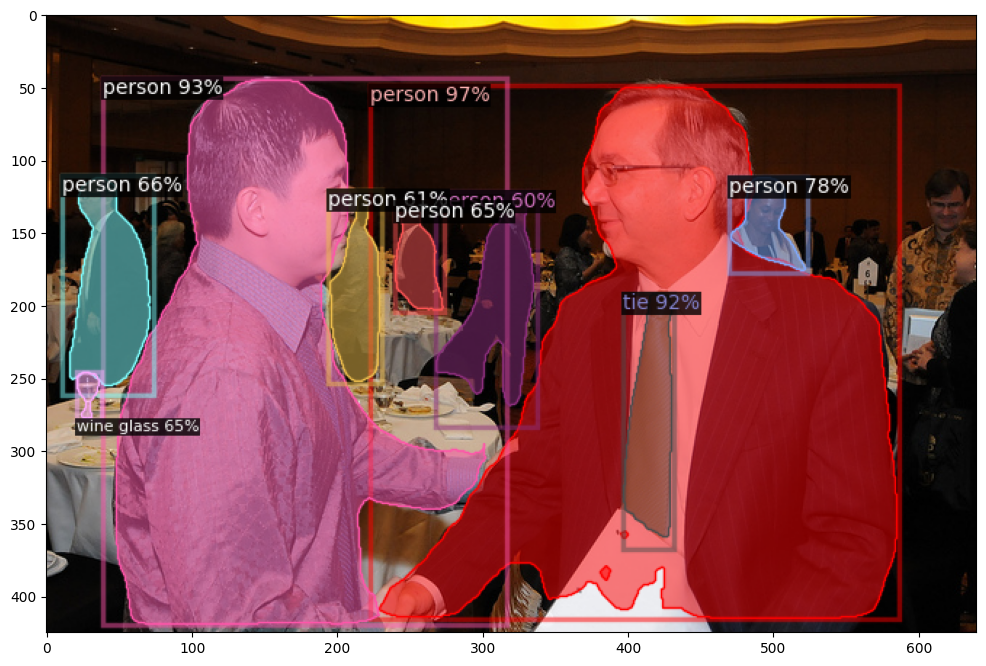

In [4]:
img = cv2.imread("./datasets/coco2017/val2017/000000004134.jpg")
predictions = predictor(img)

class_names = [
    "person", "bicycle", "car", "motorcycle", "airplane", "bus", "train",
    "truck", "boat", "traffic light", "fire hydrant", "stop sign", "parking meter",
    "bench", "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear",
    "zebra", "giraffe", "backpack", "umbrella", "handbag", "tie", "suitcase",
    "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
    "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle",
    "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple",
    "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut",
    "cake", "chair", "couch", "potted plant", "bed", "dining table", "toilet",
    "tv", "laptop", "mouse", "remote", "keyboard", "cell phone", "microwave",
    "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase",
    "scissors", "teddy bear", "hair drier", "toothbrush"
]

v = Visualizer(img, class_names=class_names)
out = v.draw_instance_predictions(predictions["instances"].to("cpu"))
img_result = out.get_image()[..., ::-1]

_ = plt.figure(figsize=(12, 10))
plt.imshow(img_result)